# 1. Logistic Reg. with Cross-Entropy Cost and Grad. Descent

## manual accomplish

     income  candidate
0  3.469038          1
1  4.333698          1
2  1.585613          0
3  2.950642          1
4  1.671030          0
最终权重: [-6.76787041  2.28422808]


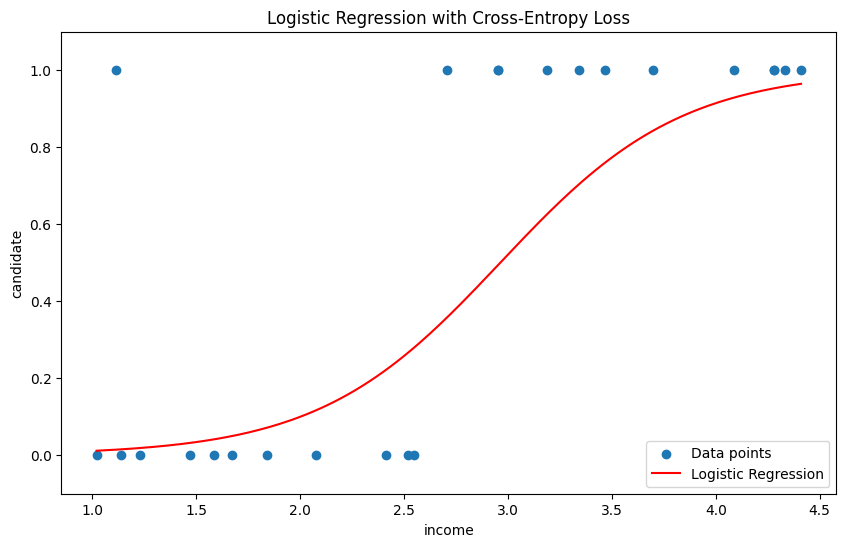

In [40]:
 # --- 导入必要的库 ---
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 定义模型 ---
def model(x_p, w):
    # 线性组合 w0 + w1*x
    a = w[0] + np.dot(x_p, w[1:])
    return a

# --- 定义 sigmoid ---
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

# --- 定义交叉熵损失函数 ---
def cross_entropy(w, x, y):
    a = sigmoid(model(x, w))
    # 计算 label=0 的损失
    ind_0 = np.argwhere(y == 0)[:, 0]
    cost = -np.sum(np.log(1 - a[ind_0]))
    # 计算 label=1 的损失
    ind_1 = np.argwhere(y == 1)[:, 0]
    cost -= np.sum(np.log(a[ind_1]))
    # 平均损失
    return cost / y.size

# --- 读取数据 ---
# 你需要保证 voters.csv 存在，且包含 'income' 和 'candidate' 两列
df = pd.read_csv('voters.csv')
print(df.head())

x = df['income'].values.reshape(-1, 1)
y = df['candidate'].values.reshape(-1, 1)

# --- 定义梯度下降 ---
def gradient_descent(cost_func, alpha, max_its, w):
    gradient = grad(cost_func)
    weight_history = [w]
    cost_history = [cost_func(w)]
    for k in range(max_its):
        grad_eval = gradient(w)
        w = w - alpha * grad_eval / np.linalg.norm(grad_eval)
        weight_history.append(w)
        cost_history.append(cost_func(w))
    return w, weight_history, cost_history

# --- 设置初始参数 ---
alpha = 1.0
max_its = 100
w_initial = np.array([[1.0], [1.0]])

# --- 梯度下降 ---
c = lambda t: cross_entropy(t, x, y)
final_weights, weight_history, cost_history = gradient_descent(c, alpha, max_its, w_initial)

print(f"最终权重: {final_weights.ravel()}")

# --- 绘制逻辑回归拟合曲线 ---
plt.figure(figsize=(10, 6))

# 数据散点
plt.scatter(x, y, label='Data points')

# 生成横坐标点
xp = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)

# 计算预测值
yp = sigmoid(model(xp, final_weights))

# 绘制逻辑回归曲线
plt.plot(xp, yp, color='red', label='Logistic Regression')

plt.xlabel('income')
plt.ylabel('candidate')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.title('Logistic Regression with Cross-Entropy Loss')
plt.show()


## Scikit learn

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [42]:
df = pd.read_csv('voters.csv')

# 打印数据框信息，确认数据
print(df.info())

# 准备特征 X 和目标 y
# scikit-learn 要求特征 X 是一个二维数组
X = df[['income']] 
y = df['candidate']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     24 non-null     float64
 1   candidate  24 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes
None


In [43]:
# 初始化一个逻辑回归模型
log_regress = linear_model.LogisticRegression()

# 使用 .fit() 方法来训练模型
# fit 函数会自动处理数据的形状
log_regress.fit(X, y)

# 我们可以查看模型学习到的系数(w1)和截距(w0)
print(f"模型系数 (w1): {log_regress.coef_}")
print(f"模型截距 (w0): {log_regress.intercept_}")

模型系数 (w1): [[1.58149153]]
模型截距 (w0): [-3.93486588]


[[1.58149153]]
[-3.93486588]


/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/ubc_ml/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


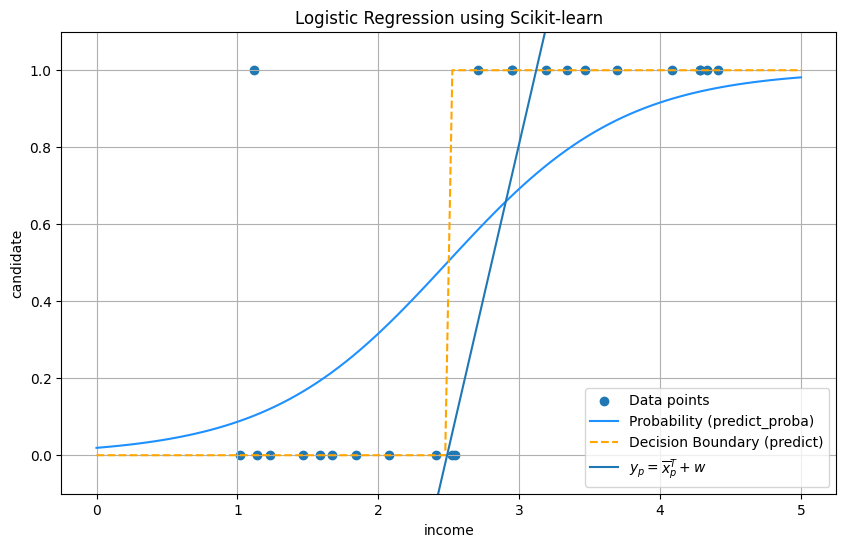

In [ ]:
# --- 绘制原始数据集 ---
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')
plt.xlabel('income')
plt.ylabel('candidate')
plt.title('Logistic Regression using Scikit-learn')

# --- 绘制学习到的逻辑回归曲线 ---
# 1. 创建一系列平滑的点用于绘图
x_plot = np.linspace(0, 5, 100).reshape(-1, 1)

# 2. 使用 predict_proba 获取这些点属于类别1的概率
# predict_proba 返回一个数组，[P(y=0), P(y=1)]，我们取第二列
y_plot_proba = log_regress.predict_proba(x_plot)[:, 1]

# 3. 绘制概率曲线
plt.plot(x_plot, y_plot_proba, color='dodgerblue', label='Probability (predict_proba)')

# --- 绘制模型的决策边界 (0/1预测结果) ---
y_plot_predict = log_regress.predict(x_plot)
plt.plot(x_plot, y_plot_predict, color='orange', linestyle='--', label='Decision Boundary (predict)')

# print(log_regress.coef_)
# print(log_regress.intercept_)
# y_p = log_regress.coef_[0][0] * x_plot + log_regress.intercept_[0]
# plt.plot(x_plot, y_p, label='$y_p=\overline{x}_p^T+w$')

plt.ylim(-0.1,1.1)
plt.grid(True)
plt.legend()
plt.show()

# 2. Logistic regression 2-class classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import linear_model

iris = datasets.load_iris()

<class 'sklearn.utils._bunch.Bunch'>


In [60]:
# get labels (for 2 classes only) and features
y = iris.target
x1 = iris.data[y<2,2]
x2 = iris.data[y<2,3]
y = y[y<2]
X = np.array([x1,x2])
X = X.T

Text(0, 0.5, 'petal width (cm)')

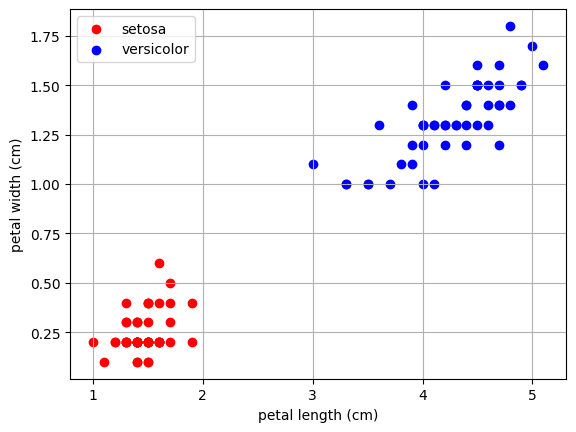

In [67]:
# scatter plot
plt.scatter(X[y==0,0],X[y==0,1],c='r',label=iris.target_names[0])
plt.scatter(X[y==1,0],X[y==1,1],c='b',label=iris.target_names[1])
plt.grid(1)
plt.legend()
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

In [62]:
# train model
log_regress = linear_model.LogisticRegression()
log_regress.fit(X,y)

LogisticRegression()

(0.0, 2.0)

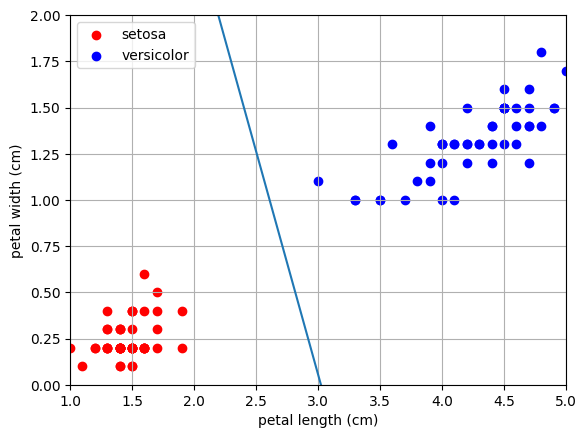

In [64]:
# scatter plot
plt.scatter(X[y==0,0],X[y==0,1],c='r')
plt.scatter(X[y==1,0],X[y==1,1],c='b')
plt.grid(1)
plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
# plot boundary
x1p = np.linspace(1,5,20)
x2p = (-log_regress.intercept_ - log_regress.coef_[0][0]*x1p)/log_regress.coef_[0][1]
plt.plot(x1p,x2p)
plt.xlim(1, 5)
plt.ylim(0, 2)